## [Fraud in Wine](https://en.wikipedia.org/wiki/Wine_fraud)

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [127]:
df = pd.read_csv('../DATA/wine_fraud.csv')

In [128]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [129]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

<AxesSubplot:xlabel='quality', ylabel='count'>

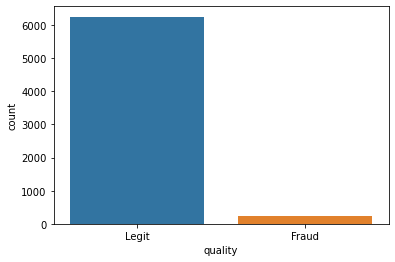

In [130]:
sns.countplot(x='quality', data=df)

<AxesSubplot:xlabel='type', ylabel='count'>

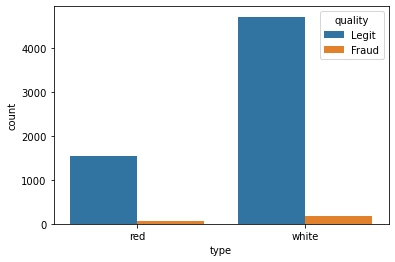

In [131]:
sns.countplot(x='type', data=df, hue = 'quality')

In [35]:
print('Percentage of fraud in Red wines')

len(df[(df['quality'] == 'Fraud') & (df['type'] == 'red')]) / df['type'].value_counts()[1] * 100

Percentage of fraud in Red wines


3.9399624765478425

In [36]:
print('Percentage of fraud in White wines')
len(df[(df['quality'] == 'Fraud') & (df['type'] == 'white')]) / df['type'].value_counts()[0] * 100

Percentage of fraud in White wines


3.7362188648427925

In [132]:
# Calculate the correlation between the various features
df['Fraud'] = df['quality'].map({'Legit':0, 'Fraud':1})

In [133]:
df.corr()['Fraud']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

In [68]:
coefs = pd.Series(index=df.corr().columns, data=df.corr()['Fraud'])
coefs = coefs.sort_values()

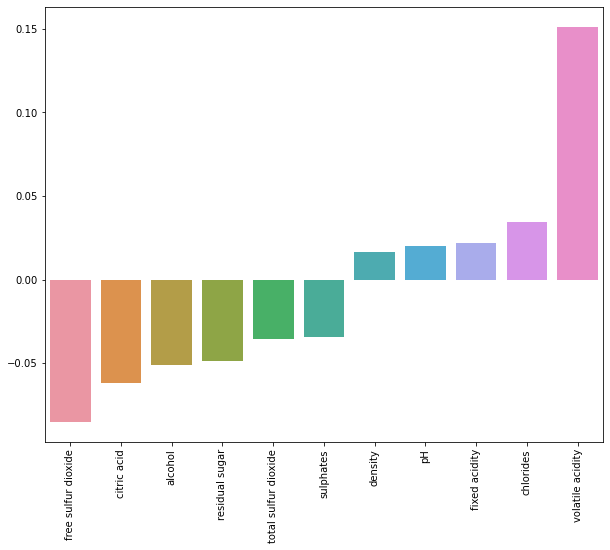

In [79]:

plt.figure(figsize=(10,8))
sns.barplot(x=coefs.index[0:11], y=coefs.values[0:11])
plt.xticks(rotation='vertical');

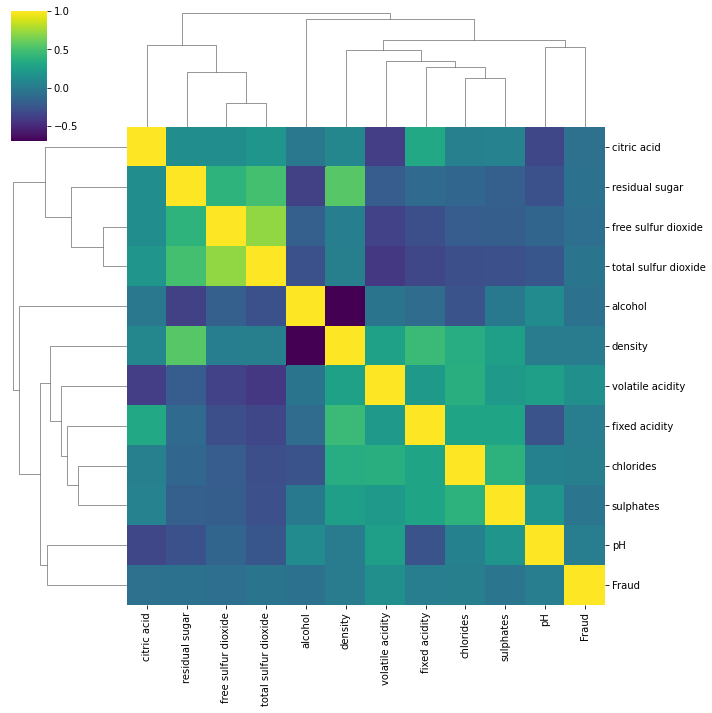

In [86]:
sns.clustermap(df.corr(), cmap='viridis', annot=True)


## Machine Learning Model

In [134]:
# Convert the categorical column "type" from a string or "red" or "white" to dummy variables
df['type'] = pd.get_dummies(df['type'], drop_first=True)

In [135]:
df = df.drop('Fraud',axis=1)

In [136]:
X = df.drop('quality', axis=1)
y = df['quality']

In [137]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [138]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.1, random_state=101)

In [139]:
scaler = StandardScaler()

In [140]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

* Create a SVM. 

In [141]:
svc = SVC(class_weight='balanced')

In [142]:
param_grid = {'C':[0.001, 0.01,0.1,0.5,1], 'gamma':['scale','auto']}
grid = GridSearchCV(svc, param_grid)

In [143]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [144]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

### Model Evaluation

In [145]:
from sklearn.metrics import confusion_matrix, classification_report

In [149]:
svm_pred = grid.predict(scaled_X_test)

In [150]:
confusion_matrix(svm_pred, y_test)

array([[ 17,  92],
       [ 10, 531]], dtype=int64)

In [151]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650

